In [33]:
import pandas as pd
import numpy as np
import string
from datetime import datetime
import statistics
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from collections import Counter

import seaborn as sns
sns.set(style='whitegrid')

plt.rcParams["figure.figsize"]=(20, 10)

# Dataset

Used Cars Dataset
Vehicles listings from Craigslist.org

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [3]:
cars = pd.read_csv('vehicles.csv')

In [4]:
cars.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Dataset motivation

Motivation: Find price based on other attributes  
ML type: regression

# Visualization

In [5]:
def drop_columns(data_set, columns_to_drop: list):
    data_set.drop(columns_to_drop, axis='columns', inplace=True)

### Get rid of meta data

In [6]:
drop_columns(cars, ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date', 'lat', 'long'])

In [7]:
cars.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

### Some info about the dataset

In [8]:
cars.isnull().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

In [9]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al


### Car production year distribution

<AxesSubplot:>

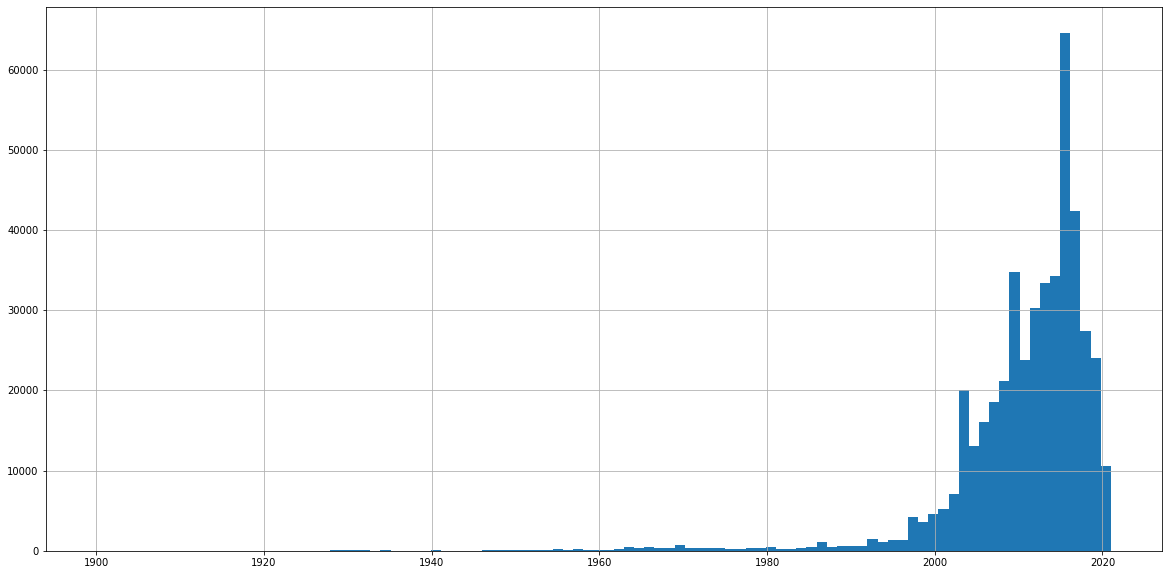

In [10]:
cars.year.hist(bins=100)

## Car price distribution

In [11]:
cars.price.isnull().any()

False

In [12]:
cars.price.describe()

count    4.582130e+05
mean     4.042093e+04
std      8.194599e+06
min      0.000000e+00
25%      4.900000e+03
50%      1.099500e+04
75%      2.149500e+04
max      3.615215e+09
Name: price, dtype: float64

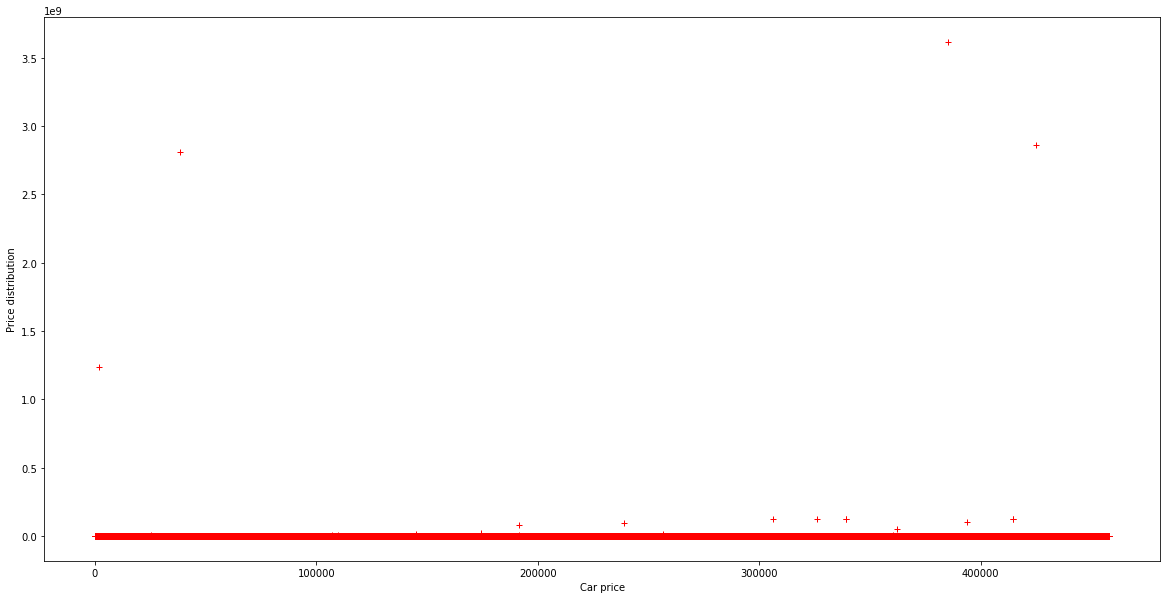

In [13]:
plt.plot(cars['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

### Price distribution under $100k

<AxesSubplot:>

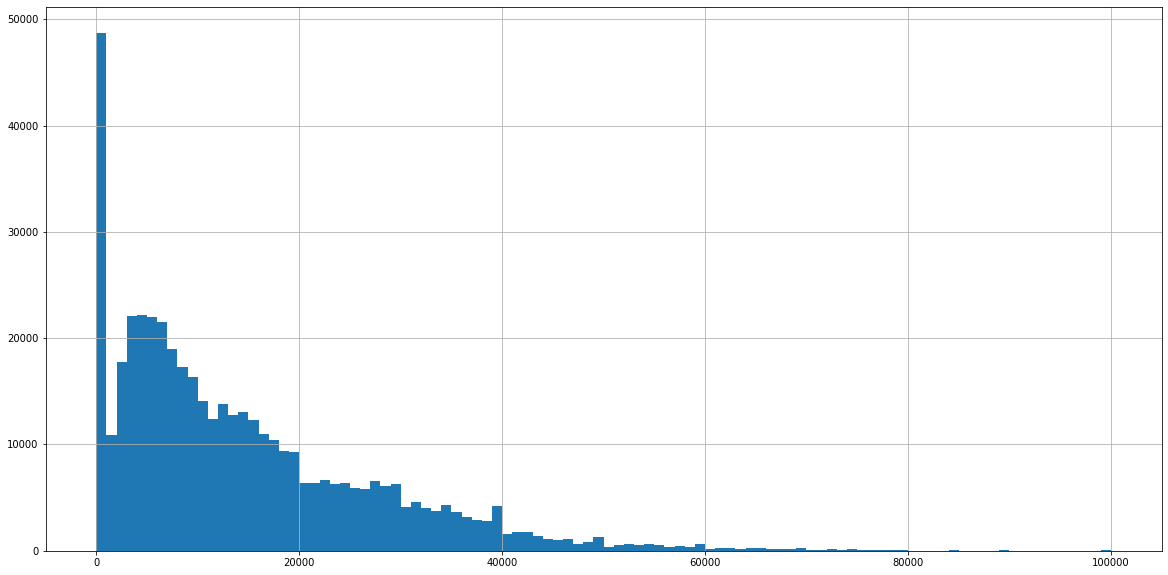

In [14]:
cars_under_100 = cars[cars.price < 100000]
cars_under_100.price.hist(bins=100)

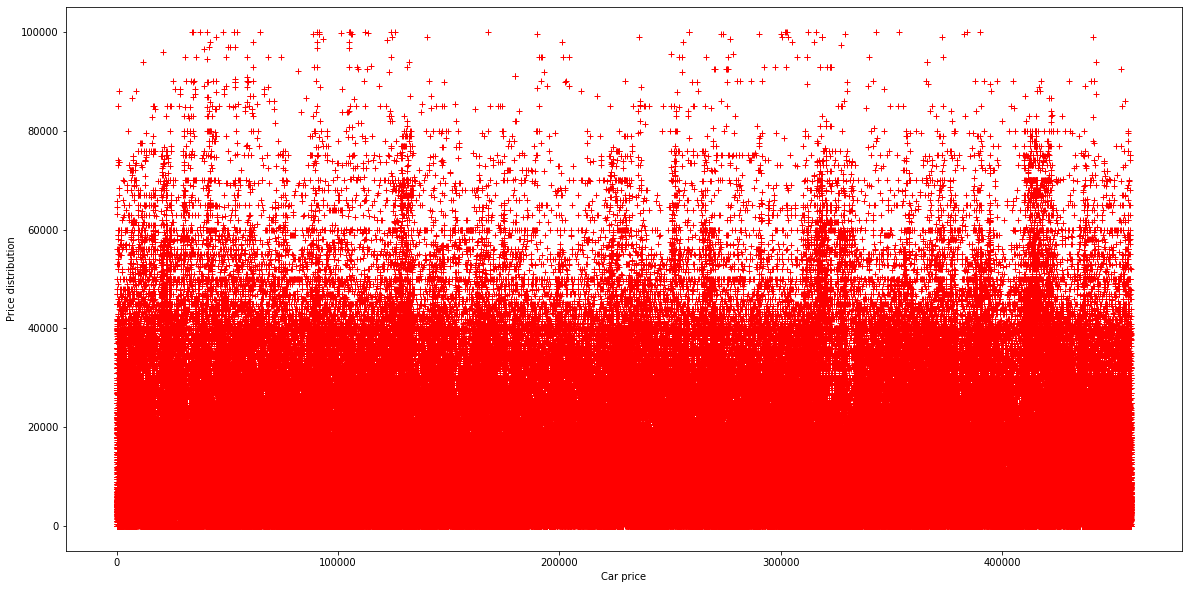

In [30]:
plt.plot(cars_under_100['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

### Removing cars without price

<AxesSubplot:>

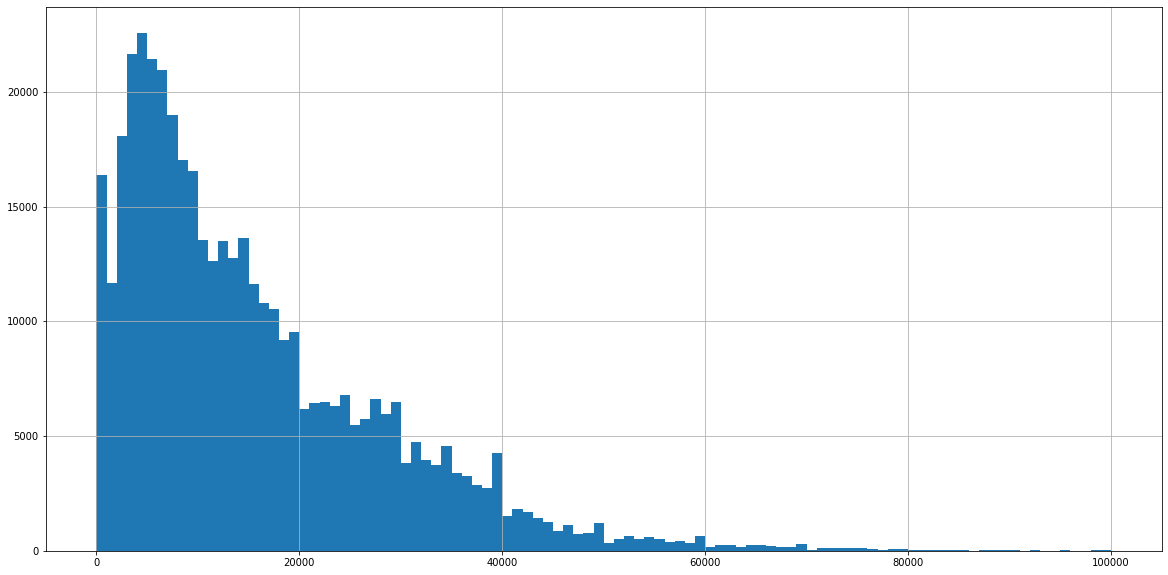

In [15]:
cars_under_100_over_0 = cars_under_100[cars_under_100.price > 0]
cars_under_100_over_0.price.hist(bins=100)

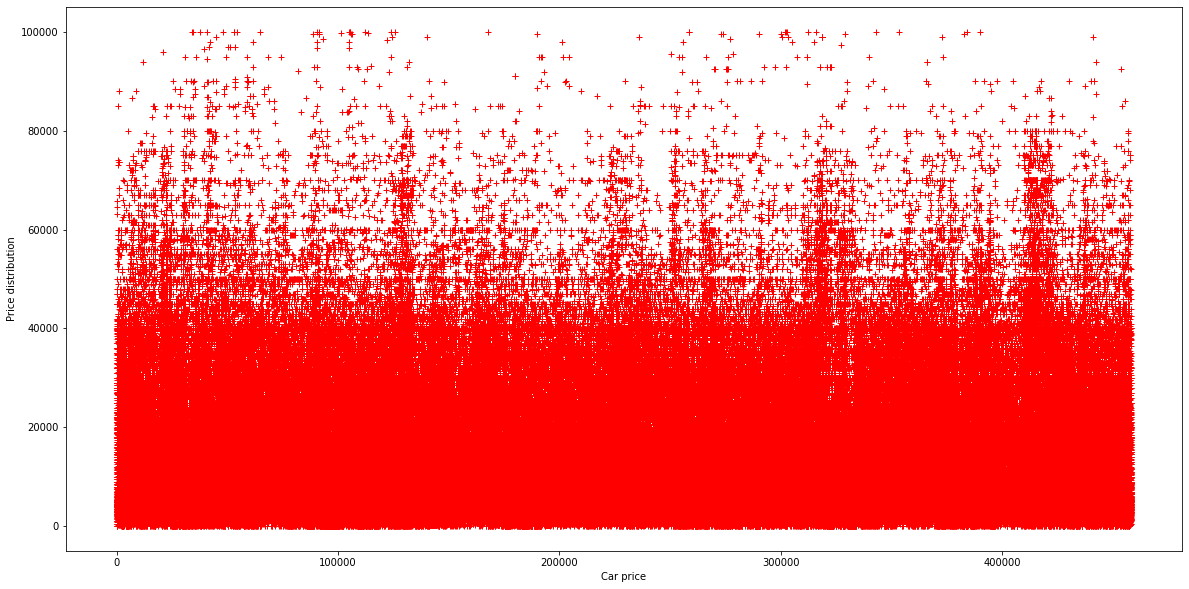

In [16]:
plt.plot(cars_under_100_over_0['price'], 'r+')
plt.xlabel("Car price")
plt.ylabel("Price distribution")
plt.show()

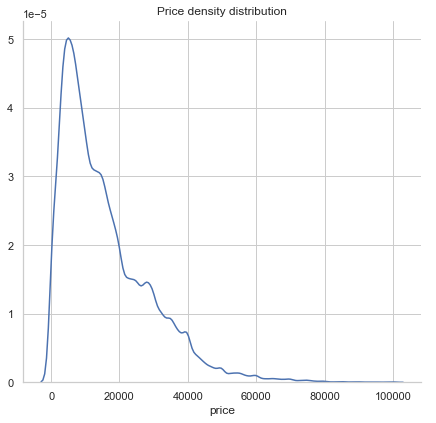

In [38]:
sns.FacetGrid(cars_under_100_over_0, height=6).map(sns.kdeplot, "price").add_legend()
plt.title('Price density distribution')
plt.show()

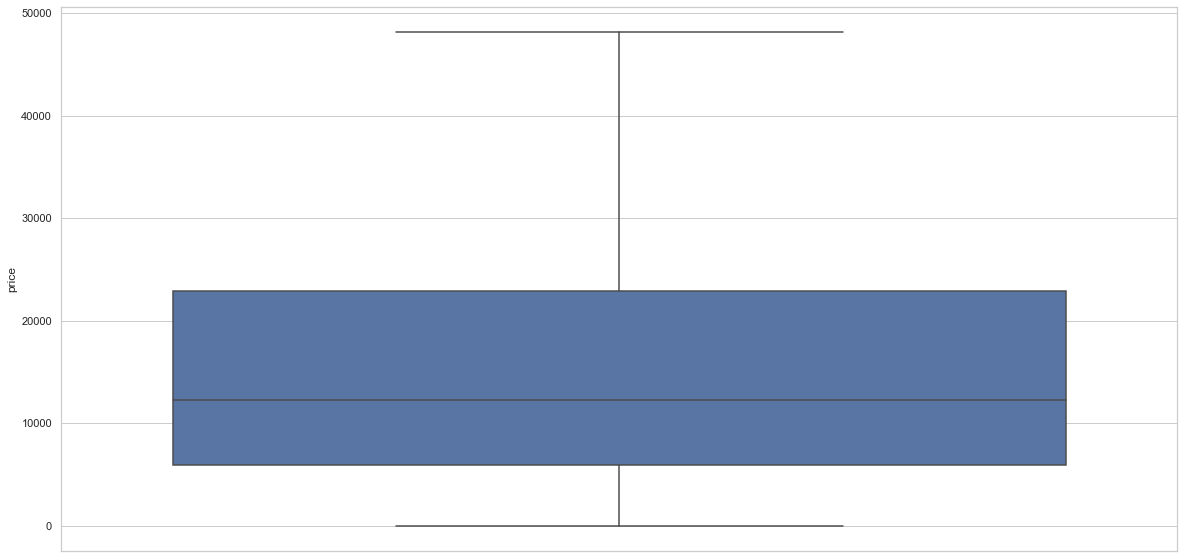

In [40]:
sns.boxplot(y='price', data=cars_under_100_over_0, showfliers=False)
plt.show()

## Plot counts

In [17]:
def plot_count_ver(col, title):
    count = Counter(list(col))
    x, y = zip(*count.most_common())

    plt.bar(x, y, )
    for i, val in enumerate(y):
               plt.annotate(val, (x[i], y[i]), color='b')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.grid(True, axis='y')
    plt.show()

### Car condition

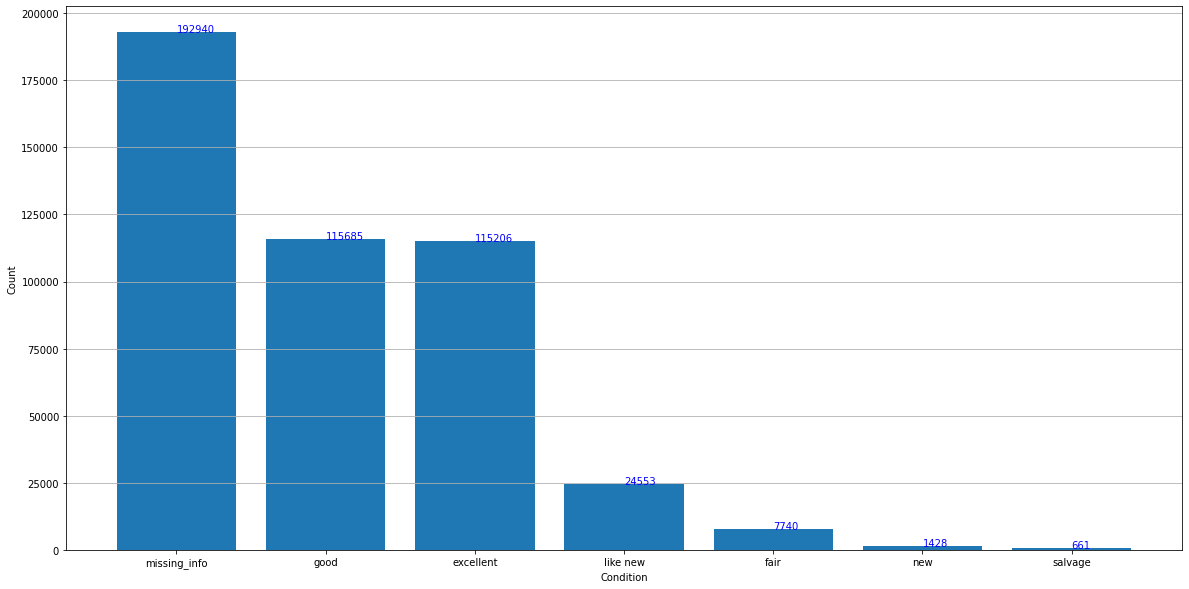

In [18]:
condition = cars.condition.replace(np.nan, 'missing_info')
plot_count_ver(condition, 'Condition')

### Cylinders

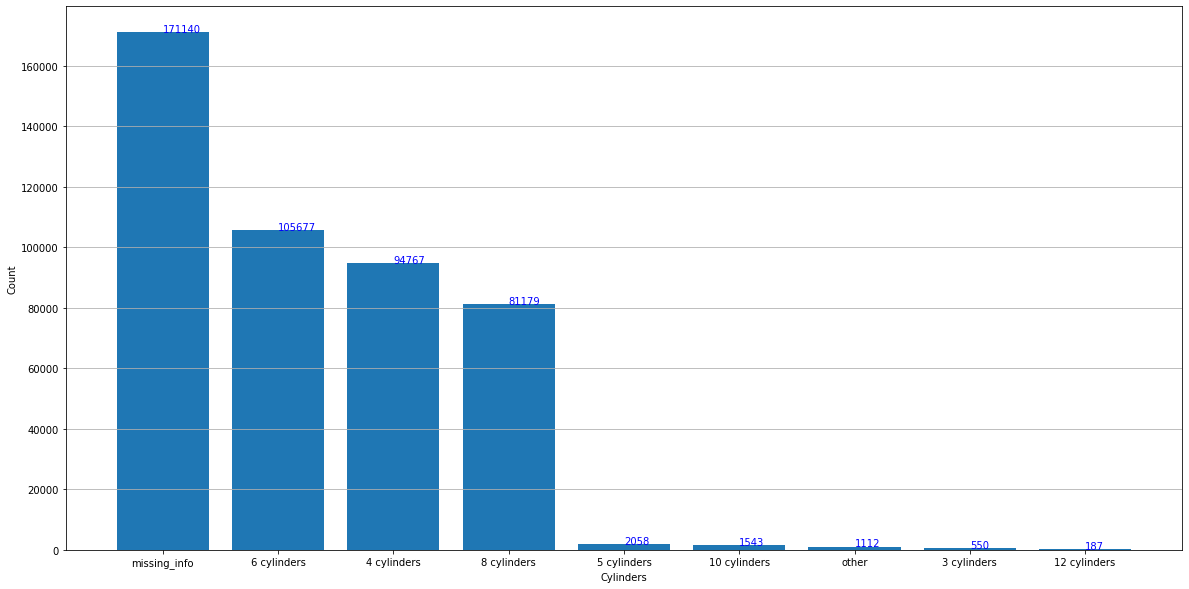

In [19]:
cylinders = cars.cylinders.replace(np.nan, 'missing_info')
plot_count_ver(cylinders, 'Cylinders')

### Fuel

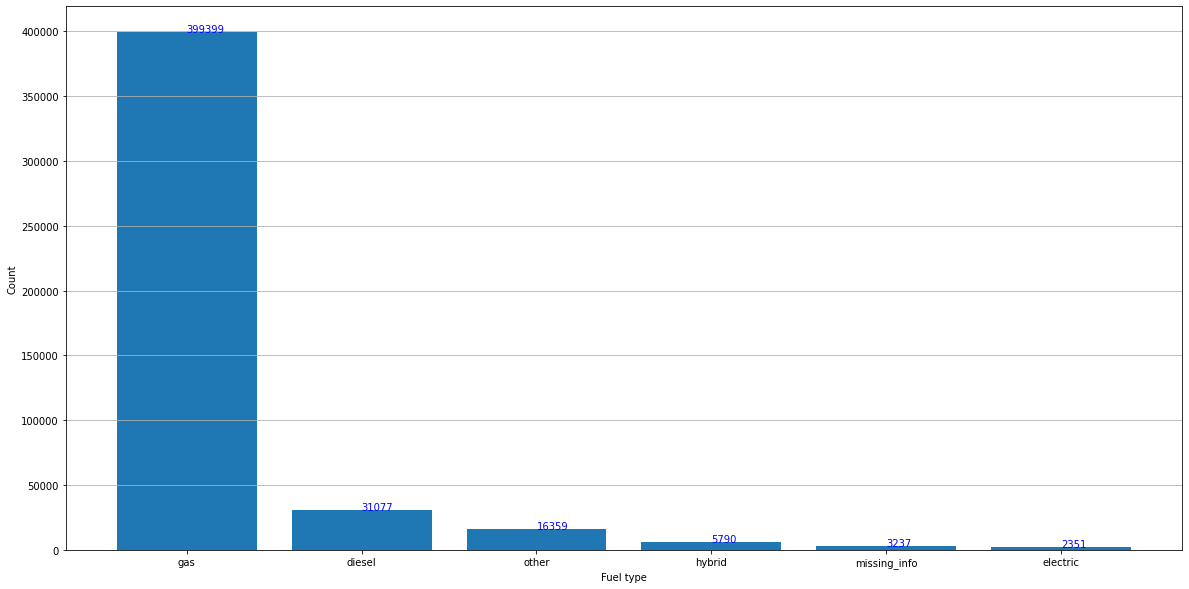

In [20]:
fuel = cars.fuel.replace(np.nan, 'missing_info')
plot_count_ver(fuel, 'Fuel type')

### Title status

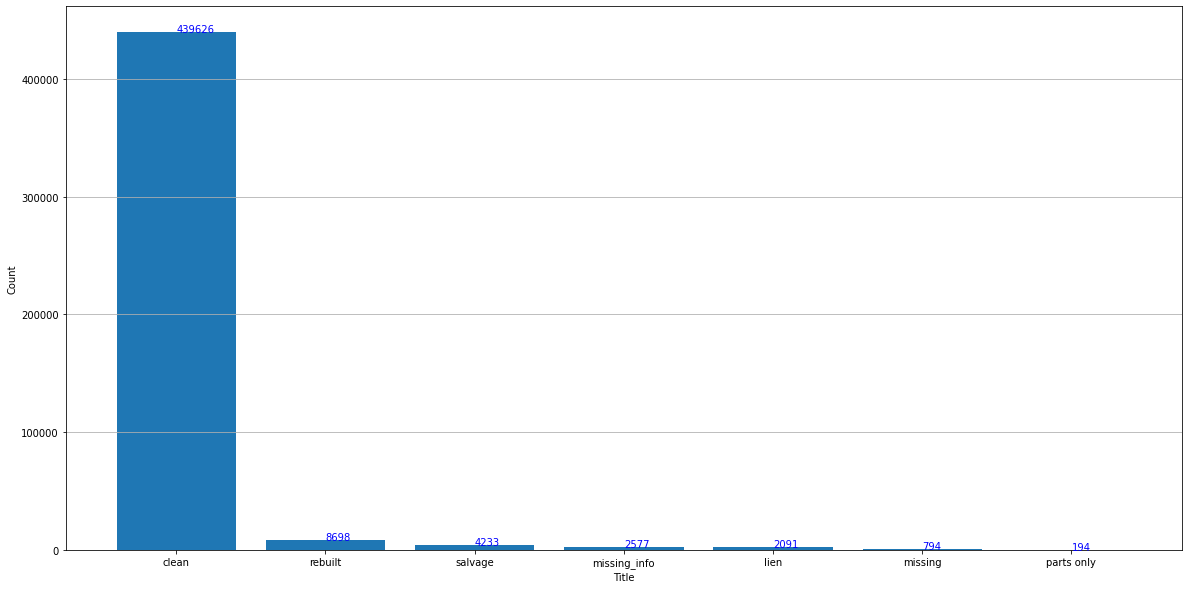

In [21]:
title_status = cars.title_status.replace(np.nan, 'missing_info')
plot_count_ver(title_status, 'Title')

Later I will remove records with title other than clean, as their price is based on different things like damages to the car.

### Transmission

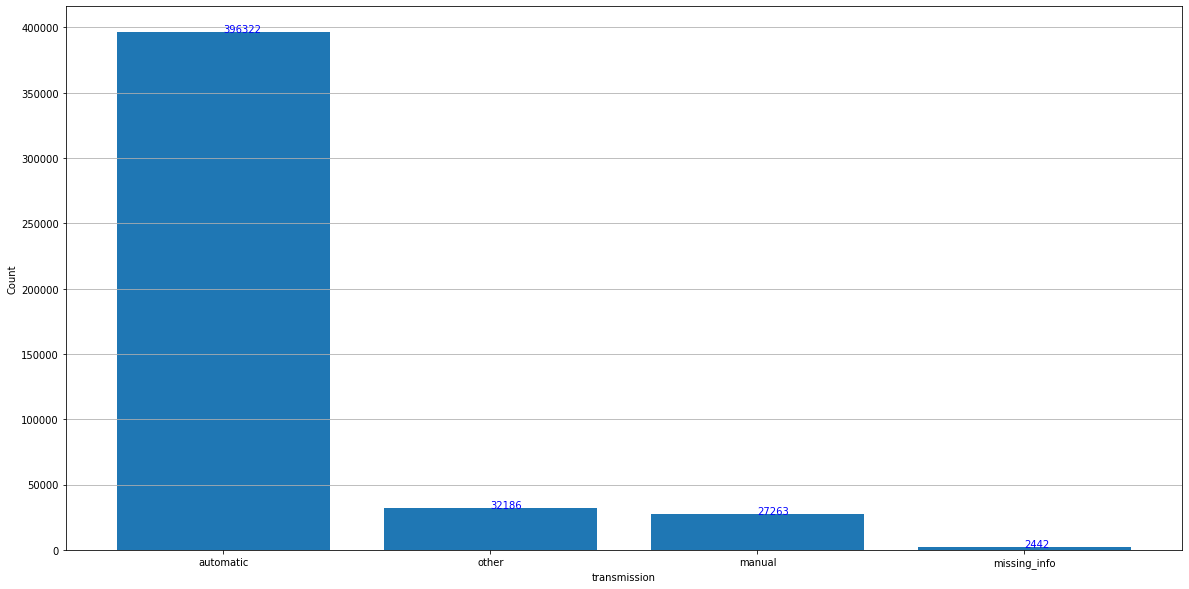

In [22]:
transmission = cars.transmission.replace(np.nan, 'missing_info')
plot_count_ver(transmission, 'transmission')

### Drive

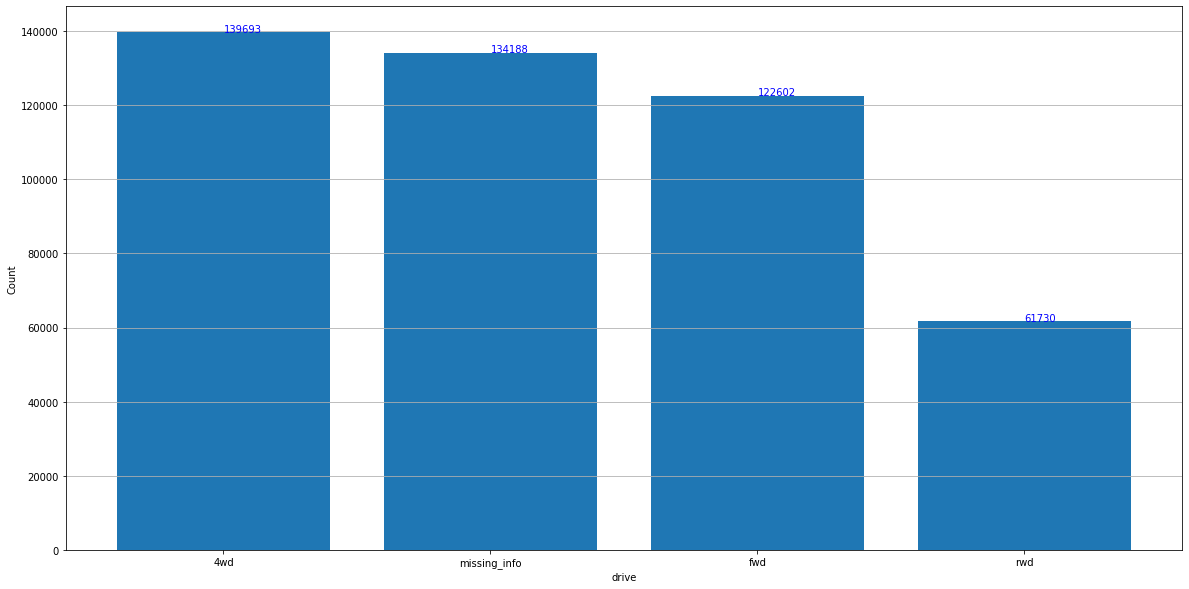

In [23]:
drive = cars.drive.replace(np.nan, 'missing_info')
plot_count_ver(drive, 'drive')

### Car size

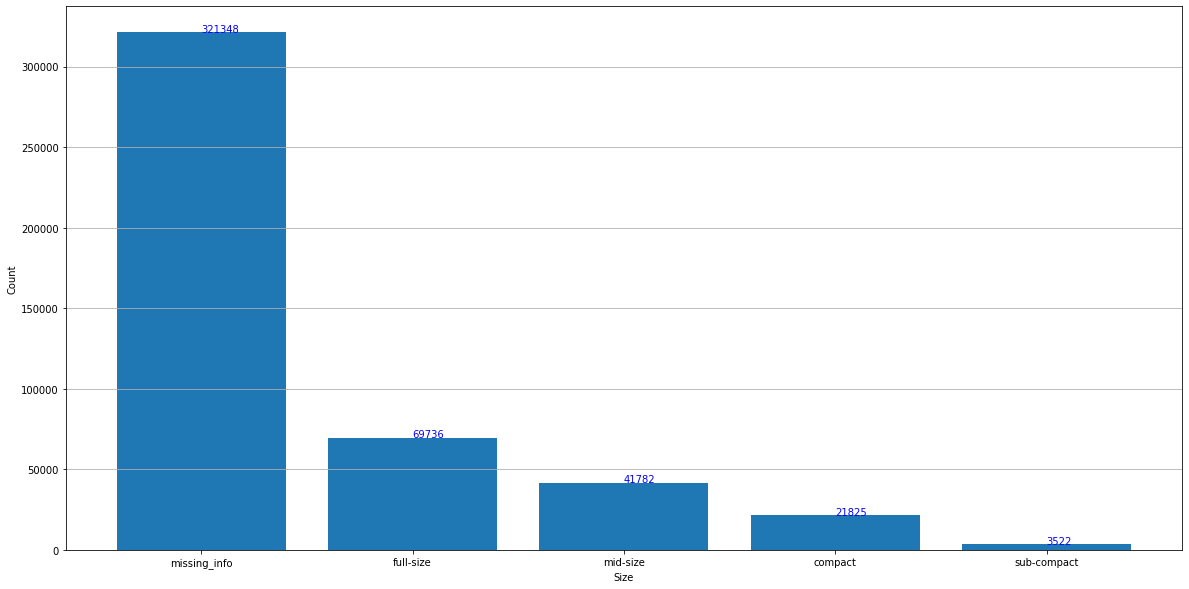

In [24]:
size = cars['size'].replace(np.nan, 'missing_info')
plot_count_ver(size, 'Size')

### Car type

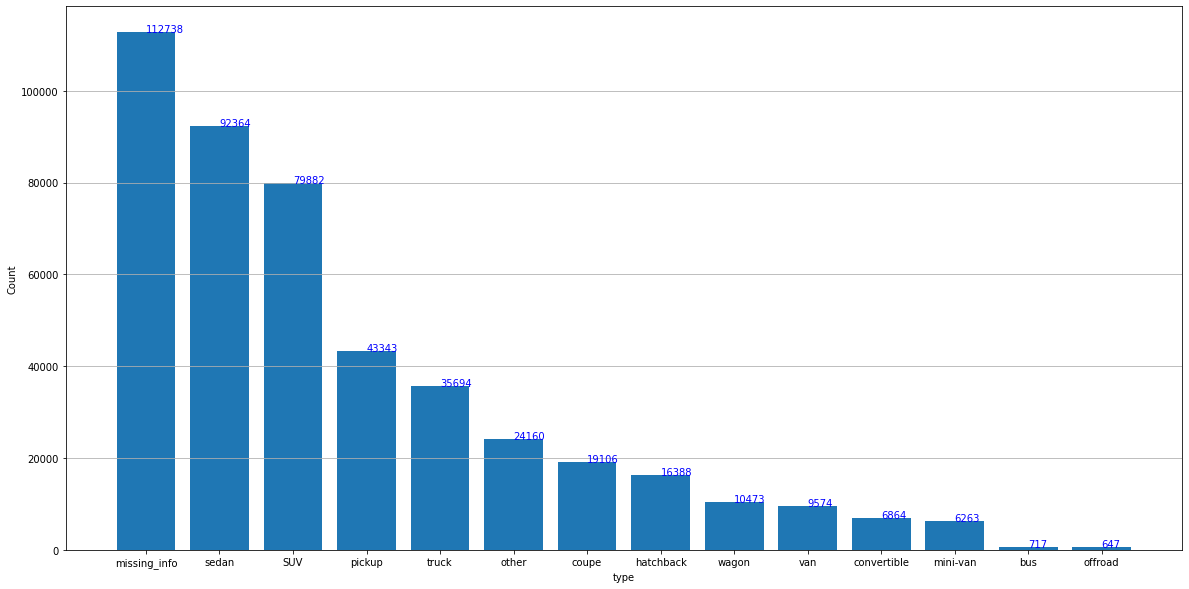

In [25]:
type = cars.type.replace(np.nan, 'missing_info')
plot_count_ver(type, 'type')

### Car color

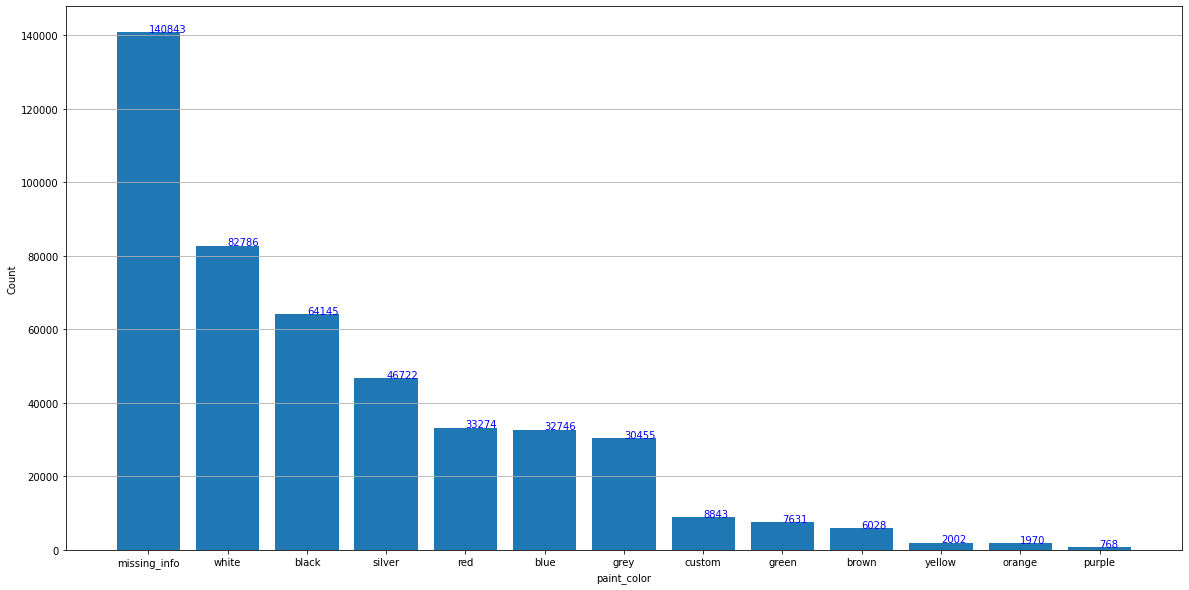

In [26]:
paint_color = cars.paint_color.replace(np.nan, 'missing_info')
plot_count_ver(paint_color, 'paint_color')

### State

In [27]:
def plot_count_hor(col, title):
    count = Counter(list(col))
    x, y = zip(*count.most_common())
    plt.figure(figsize=[14, 18])
    plt.barh(x, y, )
    for i, val in enumerate(y):
           plt.annotate(val, (y[i], x[i]), color='b')
    
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.ylabel(title)
    plt.grid(True, axis='y')
    plt.show()

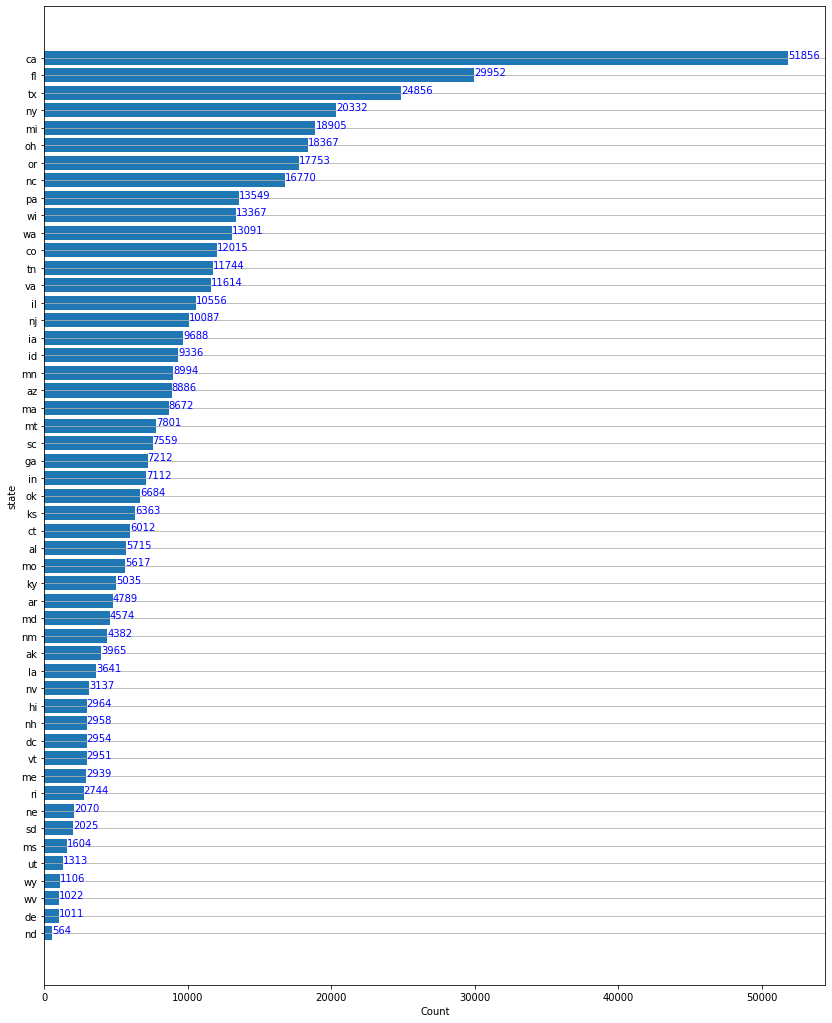

In [28]:
state = cars.state.replace(np.nan, 'missing_info')
plot_count_hor(state, 'state')

### Identify outliers

As we saw before, there are some records that mess up with the price distribution

In [43]:
for i in range(90, 100, 1):
    c = cars['price'].values
    c = np.sort(c, axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var) * (float(i) / 100))]))

print("100 percentile value is ", c[-1]) 

90 percentile value is 33500
91 percentile value is 34902
92 percentile value is 35990
93 percentile value is 36995
94 percentile value is 38888
95 percentile value is 39990
96 percentile value is 41999
97 percentile value is 45000
98 percentile value is 49999
99 percentile value is 59900
100 percentile value is  3615215112


The majority of cars (99%) have price under $60k